<a href="https://colab.research.google.com/github/Sursuri69/Machine-Learning-LAB/blob/main/Practical%20no%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Customer DataSet.csv")


df.info()
df.head()


Saving Customer DataSet.csv to Customer DataSet (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:

df.drop(columns=['CUST_ID'], inplace=True)


imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)


df_scaled.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,1.016195e-16,-2.540488e-17,1.270244e-17,-9.526830e-18,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221479e+00,-5.986883e-01,-3.621989e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954727e-01,-4.662913e-01,-2.889613e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.106928e-01,-3.026846e-01,-2.283069e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512570e-01,5.802976e-02,-2.408976e-02,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010063e+00,1.692228e+01,3.239273e+01,2.893453e+00,3.606795e-01


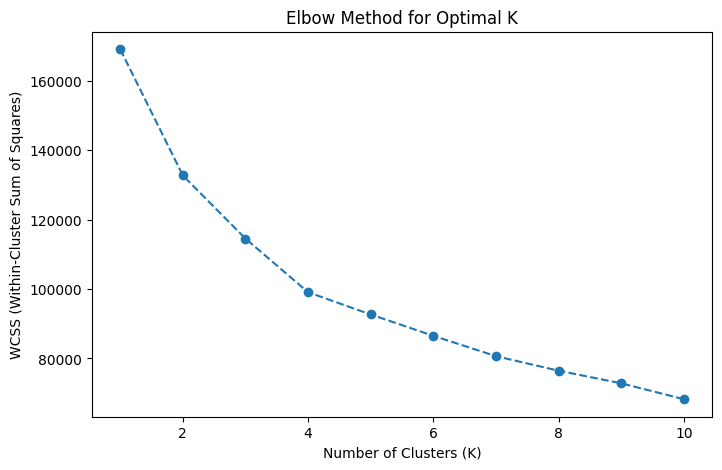

In [11]:

wcss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [5]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df_scaled['Cluster'].value_counts()


,count
Cluster,
0,3977
3,3367
2,1197
1,409


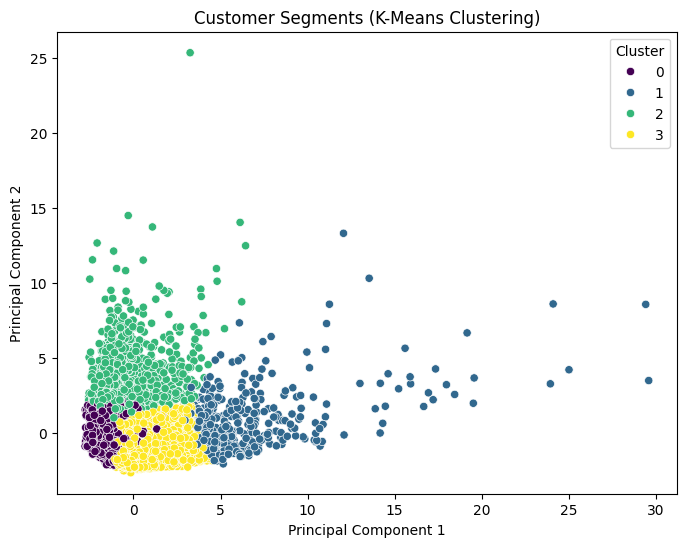

In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled.drop(columns=['Cluster'])), columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_scaled['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df_pca['Cluster'], palette='viridis', data=df_pca)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [7]:

cluster_summary = df_imputed.copy()
cluster_summary['Cluster'] = df_scaled['Cluster']
cluster_summary.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
2,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595
